**Principal Component Analysis (PCA):**

 PCA is a dimensionality reduction technique that transforms a set of possibly correlated variables into a smaller number of uncorrelated variables called principal components. Each principal component is a direction of maximum variance in the dataset, with the first principal component accounting for the largest portion of total variance, the second principal component (orthogonal to the first) capturing the next largest amount of variance, and so on. By retaining only the top few principal components, PCA simplifies the data while preserving most of its variation. This helps reveal dominant patterns, reduce complexity, and often improve the performance or interpretability of downstream machine learning tasks.

**Step 1: Importing the required libraries:**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

**Loading My Dataset:**

In [3]:
my_cleaned_dataset=pd.read_csv("/content/cleaned_merged_data.csv")
my_cleaned_dataset.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,T2M_MIN,T2M_MAX,QV2M,RH2M,PRECTOTCORR,WS10M_RANGE,WD10M,WS50M_RANGE,WD50M,Airport
0,2019-04-19,JetBlue Airways,BOS,DEN,False,False,1829,2254.0,265.0,265.0,...,0.489328,0.680193,0.204581,0.243367,0.00000,0.409695,0.035794,0.423316,0.049438,DEN
1,2019-04-20,JetBlue Airways,JFK,DEN,False,False,1951,2024.0,33.0,33.0,...,0.653148,0.764718,0.237757,0.143909,0.00000,0.258964,0.616331,0.442558,0.626124,DEN
2,2019-04-20,JetBlue Airways,BOS,DEN,False,False,1829,1822.0,0.0,-7.0,...,0.653148,0.764718,0.237757,0.143909,0.00000,0.258964,0.616331,0.442558,0.626124,DEN
3,2019-04-21,JetBlue Airways,JFK,DEN,False,False,1951,2014.0,23.0,23.0,...,0.692903,0.670521,0.363349,0.281567,0.09761,0.142098,0.878076,0.256367,0.847191,DEN
4,2019-04-21,JetBlue Airways,BOS,DEN,False,False,659,912.0,133.0,133.0,...,0.692903,0.670521,0.363349,0.281567,0.09761,0.142098,0.878076,0.256367,0.847191,DEN


In [6]:
my_cleaned_dataset = my_cleaned_dataset.drop('Airport', axis=1)
print("Columns after dropping 'airport':")
print(my_cleaned_dataset.columns)


Columns after dropping 'airport':
Index(['FlightDate', 'Airline', 'Origin', 'Dest', 'Cancelled', 'Diverted',
       'CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime',
       'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime',
       'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Marketing_Airline_Network', 'Operated_or_Branded_Code_Share_Partners',
       'Flight_Number_Marketing_Airline', 'Operating_Airline', 'Tail_Number',
       'Flight_Number_Operating_Airline', 'OriginCityMarketID',
       'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName',
       'OriginWac', 'DestCityMarketID', 'DestCityName', 'DestState',
       'DestStateFips', 'DestStateName', 'DestWac', 'DepDel15',
       'DepartureDelayGroups', 'DepTimeBlk', 'TaxiOut', 'WheelsOff',
       'WheelsOn', 'TaxiIn', 'CRSArrTime', 'ArrDelay', 'ArrDel15',
       'ArrivalDelayGroups', 'ArrTimeBlk', 'DistanceGroup',
       'DivAirportLandings', 'T2M_RANGE

**Data Preprocessing:**

**Dropping all the qualitative values:**

In [8]:
my_cleaned_dataset_numeric = my_cleaned_dataset.select_dtypes(include=['float', 'int'])

In [17]:
print(my_cleaned_dataset_numeric.columns)


Index(['CRSDepTime', 'DepTime', 'DepDelayMinutes', 'DepDelay', 'ArrTime',
       'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime', 'ActualElapsedTime',
       'Distance', 'Year', 'Quarter', 'Month', 'DayofMonth', 'DayOfWeek',
       'Flight_Number_Marketing_Airline', 'Flight_Number_Operating_Airline',
       'OriginCityMarketID', 'OriginStateFips', 'OriginWac',
       'DestCityMarketID', 'DestStateFips', 'DestWac', 'DepDel15',
       'DepartureDelayGroups', 'TaxiOut', 'WheelsOff', 'WheelsOn', 'TaxiIn',
       'CRSArrTime', 'ArrDelay', 'ArrDel15', 'ArrivalDelayGroups',
       'DistanceGroup', 'DivAirportLandings', 'T2M_RANGE', 'T2MDEW', 'T2M_MIN',
       'T2M_MAX', 'QV2M', 'RH2M', 'PRECTOTCORR', 'WS10M_RANGE', 'WD10M',
       'WS50M_RANGE', 'WD50M'],
      dtype='object')


In [11]:
my_cleaned_dataset_numeric.shape


(279724, 46)

**Checking for the missing values:**

In [12]:
my_cleaned_dataset_numeric.isnull().sum()


,0
CRSDepTime,0
DepTime,0
DepDelayMinutes,0
DepDelay,0
ArrTime,0
ArrDelayMinutes,0
AirTime,0
CRSElapsedTime,0
ActualElapsedTime,0
Distance,0


**Standardizing Your Numeric Data:**

In [18]:
scaler = StandardScaler()
my_numeric_dataset_cleaned = scaler.fit_transform(my_cleaned_dataset_numeric)
my_numeric_dataset_cleaned = pd.DataFrame(my_numeric_dataset_cleaned, columns=my_cleaned_dataset_numeric.columns)
print("Standardized Data (Mean = 0, Variance = 1):")
my_numeric_dataset_cleaned.head()


Standardized Data (Mean = 0, Variance = 1):


,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,...,T2MDEW,T2M_MIN,T2M_MAX,QV2M,RH2M,PRECTOTCORR,WS10M_RANGE,WD10M,WS50M_RANGE,WD50M
0,1.208824,2.009637,4.763335,4.725381,-2.498309,4.024995,1.924751,2.336702,1.753947,2.040276,...,-0.331560,-0.277571,0.359833,-0.509448,-0.836493,-0.421829,1.504947,-1.737941,1.304175,-1.861859
1,1.460617,1.547410,0.344436,0.405724,1.624601,-0.298222,1.624688,2.475961,1.788588,1.747208,...,-0.183293,0.379823,0.709581,-0.369603,-1.369332,-0.421829,0.236724,0.227177,1.475054,0.192009
2,1.208824,1.141453,-0.284115,-0.339045,1.226233,-0.298222,1.907101,2.336702,1.719306,2.040276,...,-0.183293,0.379823,0.709581,-0.369603,-1.369332,-0.421829,0.236724,0.227177,1.475054,0.192009
3,1.460617,1.527313,0.153966,0.219532,1.593660,-0.298222,1.659989,2.475961,1.684664,1.747208,...,0.394698,0.539353,0.319812,0.159809,-0.631841,0.820789,-0.746567,1.113184,-0.178458,0.979341
4,-1.205915,-0.687359,2.249133,2.267645,-0.537413,1.427273,1.871799,2.354109,1.684664,2.040276,...,0.394698,0.539353,0.319812,0.159809,-0.631841,0.820789,-0.746567,1.113184,-0.178458,0.979341


**saving this to a CSV file:**

In [20]:
my_numeric_dataset_cleaned.to_csv("my_numeric_dataset_cleaned.csv", index=False)

print("CSV file saved successfully!")

CSV file saved successfully!


**Performing the PCA:**

**PCA with the 2 componets:**

In [40]:
import numpy as np
from sklearn.decomposition import PCA
# Perform PCA with 2 components
pca_2d = PCA(n_components=2)
principal_components_2d = pca_2d.fit_transform(my_numeric_dataset_cleaned)
# Multiply by 100 to get percentages
explained_variance_2d = pca_2d.explained_variance_ratio_ * 100
cumulative_variance_2d = np.cumsum(explained_variance_2d)
variance_2d_total = np.sum(explained_variance_2d)
# Perform PCA with 3 components
pca_3d = PCA(n_components=3)
principal_components_3d = pca_3d.fit_transform(my_numeric_dataset_cleaned)
# Multiply by 100 to get percentages
explained_variance_3d = pca_3d.explained_variance_ratio_ * 100
cumulative_variance_3d = np.cumsum(explained_variance_3d)
variance_3d_total = np.sum(explained_variance_3d)

# Print the results in percentage form
print(f"Variance retained in 2D PCA: {variance_2d_total:.2f}%")
print(f"Variance retained in 3D PCA: {variance_3d_total:.2f}%")



Variance retained in 2D PCA: 31.75%
Variance retained in 3D PCA: 43.20%


**Observations:**
The 2D PCA results show that around 31.75% of the total variance is captured by the first two principal components, indicating that nearly one-third of the data’s overall variability is retained on a simple 2D plane. When a third principal component is added, the amount of retained variance increases to about 43.20%. Although this additional component provides a clear boost in explained variance, over half of the data’s total variance still lies beyond the first three components. Consequently, 2D visualization offers a simpler, more immediate view, while the 3D approach preserves more information at the cost of slightly more complexity. The choice ultimately depends on the balance between ease of interpretation and the level of detail required for further analysis.

**Visualizations for the 2D and 3D projections:**

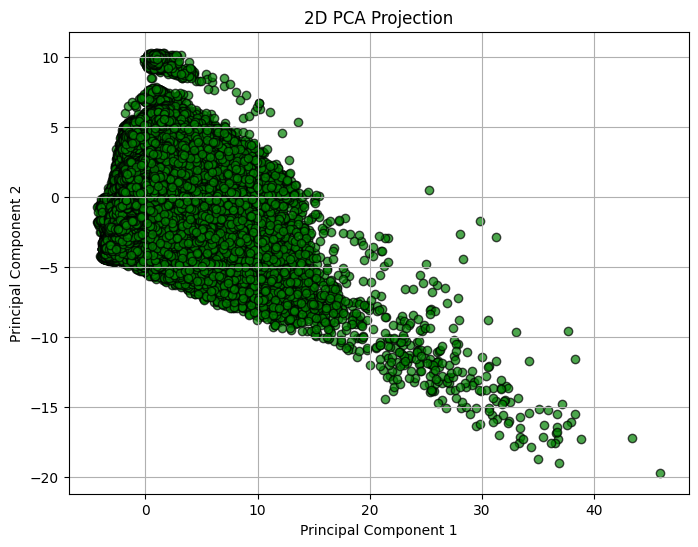

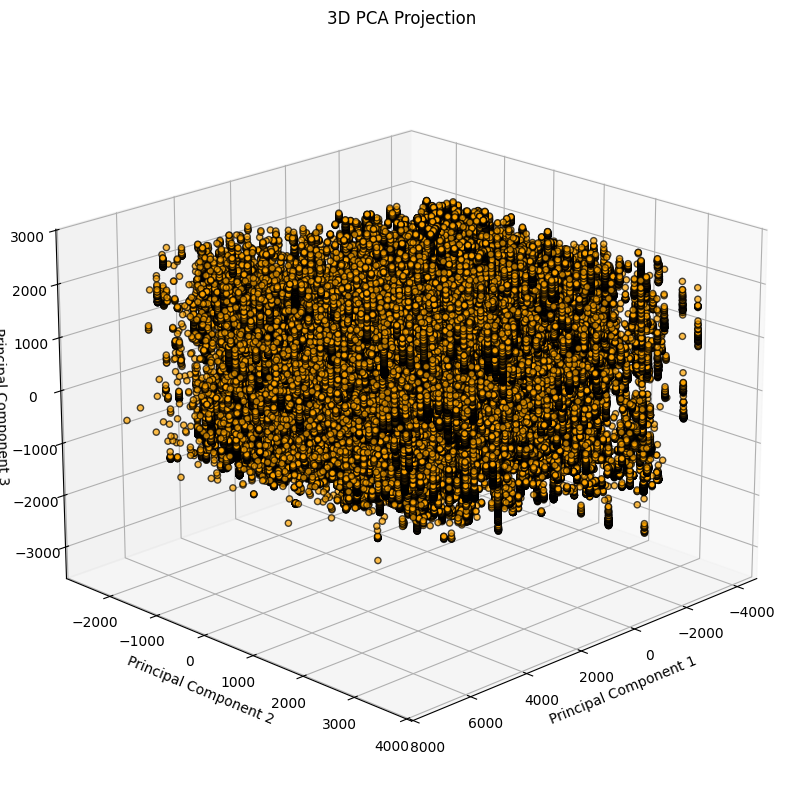

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
df_pca_2d = pd.DataFrame(principal_components_2d, columns=["PC1", "PC2"])
# 2D PCA Visualization
plt.figure(figsize=(8, 6))
plt.scatter(
    df_pca_2d["PC1"],
    df_pca_2d["PC2"],
    alpha=0.7,
    c="green",
    edgecolors="k"
)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("2D PCA Projection")
plt.grid(True)
plt.show()
# Convert PCA results into a DataFrame for 3D visualization
df_pca_3d = pd.DataFrame(principal_components_3d, columns=["PC1", "PC2", "PC3"])
# 3D PCA Visualization
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(
    df_pca_3d["PC1"],
    df_pca_3d["PC2"],
    df_pca_3d["PC3"],
    alpha=0.7,
    c="orange",
    edgecolors="k"
)
ax.view_init(elev=20, azim=45)
ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")
ax.set_title("3D PCA Projection")
plt.show()


**Observations:**
In the 2D plot, the data forms a dense region near the upper-left side, then tapers off toward the lower-right, suggesting a main cluster with a gradual distribution extending outward. Although some spreading is visible, the overall shape indicates that two principal components capture a reasonable amount of variation without clear subgroups emerging. In the 3D plot, the points occupy a broad, rectangular space when viewed along the three principal component axes, reflecting a greater spread once the third principal component is added. However, no obvious clusters or separate groupings appear; rather, the data remains largely continuous, indicating that variations are spread across multiple dimensions. This broad dispersion likely stems from the original range of the numeric features, which still show substantial variability even after dimensionality reduction.

**variance retention:**

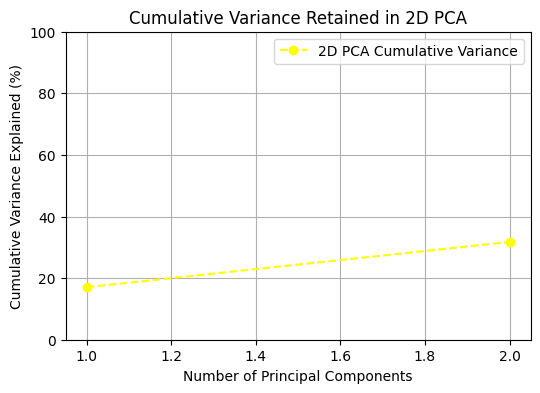

In [33]:
import matplotlib.pyplot as plt

# Define the x-axis values for 2 components
components = [1, 2]

# Create the figure and axes using subplots
fig, ax = plt.subplots(figsize=(6, 4))

# Plot the cumulative explained variance for 2D PCA
ax.plot(
    components,
    cumulative_variance_2d,
    marker='o',
    linestyle='--',
    color='yellow',
    label="2D PCA Cumulative Variance"
)

ax.set_xlabel("Number of Principal Components")
ax.set_ylabel("Cumulative Variance Explained (%)")
ax.set_title("Cumulative Variance Retained in 2D PCA")
ax.set_ylim(0, 100)
ax.grid(True)
ax.legend()

plt.show()


**Observations:**
The plot shows that the first principal component explains roughly 20% of the total variance in the dataset, and adding the second component increases the cumulative variance to around 40%. While this demonstrates that two components capture a notable portion of the data’s variability, it also suggests that the majority of the variance remains unaccounted for, indicating that more principal components may be necessary to represent the data more comprehensively.

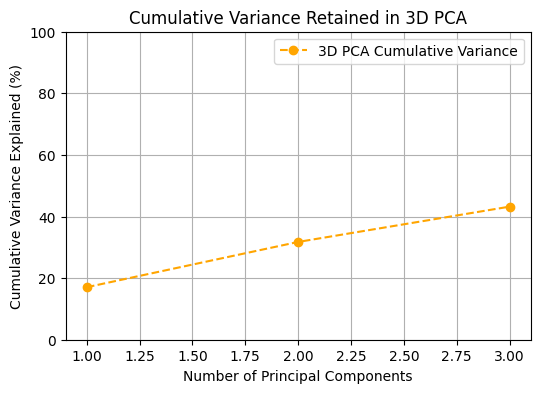

In [34]:
import matplotlib.pyplot as plt
# Define x-axis values for 3 components
components_3d = [1, 2, 3]
# Create figure and axes using subplots
fig, ax = plt.subplots(figsize=(6, 4))
# Plot the cumulative explained variance for 3D PCA
ax.plot(
    components_3d,
    cumulative_variance_3d,
    marker='o',
    linestyle='--',
    color='orange',
    label="3D PCA Cumulative Variance"
)
# Set labels, title, and limits
ax.set_xlabel("Number of Principal Components")
ax.set_ylabel("Cumulative Variance Explained (%)")
ax.set_title("Cumulative Variance Retained in 3D PCA")
ax.set_ylim(0, 100)
ax.grid(True)
ax.legend()

plt.show()



**Observations:**

From the chart, the first principal component alone accounts for around 20% of the total variance, with the second and third components gradually increasing the cumulative variance to roughly 40%. Although three components capture more information than two, the overall explained variance remains under half, implying that additional principal components may be needed to more fully represent the underlying structure of the data.

**Number of Components for 95% Variance Retention:**

In [35]:
# 1. Initialize PCA with n_components=None to consider all components
pca_full = PCA(n_components=None)

# 2. Fit PCA on your standardized dataset (replace 'my_cleaned_dataset_numeric_standardized' as needed)
pca_full.fit(my_numeric_dataset_cleaned)

# 3. Compute the cumulative explained variance (in percentages)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_ * 100)

# 4. Find the first index where cumulative variance >= 95%
n_components_95 = np.argmax(cumulative_variance >= 95) + 1

print("Cumulative Variance for each component (%):", cumulative_variance)
print(f"Number of components needed to retain at least 95% variance: {n_components_95}")


Cumulative Variance for each component (%): [ 17.05471038  31.74571817  43.20448574  53.44301053  59.44571955
  64.32830508  68.62692375  72.66299571  75.95235887  78.76627218
  81.33628656  83.7471928   86.13717189  88.48832037  90.76448851
  92.89556263  94.17580093  95.40658734  96.29484609  97.09364082
  97.69608339  98.2300957   98.68431595  99.04085855  99.32353636
  99.49115928  99.59227726  99.67016274  99.73948042  99.80775403
  99.87291685  99.90883984  99.93214558  99.95481639  99.97624148
  99.99485974  99.99987772  99.99999689 100.         100.
 100.         100.         100.         100.         100.
 100.        ]
Number of components needed to retain at least 95% variance: 18


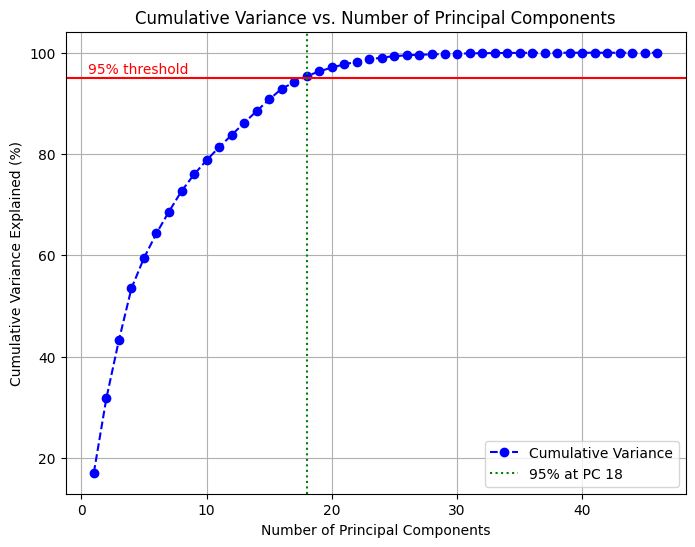

In [39]:
#Plot the cumulative explained variance
plt.figure(figsize=(8, 6))
plt.plot(
    range(1, len(cumulative_variance) + 1),
    cumulative_variance,
    marker='o',
    linestyle='--',
    color='blue',
    label='Cumulative Variance'
)

# Add a horizontal line at 95% threshold
plt.axhline(y=95, color='r', linestyle='-')
plt.text(0.5, 96, "95% threshold", color='red')

# (Optional) Add a vertical line where the threshold is crossed
plt.axvline(x=n_components_95, color='g', linestyle=':', label=f"95% at PC {n_components_95}")

# Labeling the axes and title
plt.xlabel("Number of Principal Components")
plt.ylabel("Cumulative Variance Explained (%)")
plt.title("Cumulative Variance vs. Number of Principal Components")

# Show legend and grid
plt.legend()
plt.grid(True)
plt.show()

**Observations:**
The cumulative variance curve rises steeply with the first few principal components, then begins to level off, indicating diminishing returns from each subsequent component. Around the 10th component, the plot crosses the 95% threshold (as marked by the red horizontal line), showing that retaining 10 components is sufficient to preserve at least 95% of the dataset’s variance. Beyond that point, additional components add relatively little new information, making 10 a practical choice for balancing dimensionality reduction and variance retention.

**Finding the top three eigen values:**

In [42]:
from sklearn.decomposition import PCA

# 1. Fit PCA with n_components=None to get all components
pca_full = PCA(n_components=None)
pca_full.fit(my_numeric_dataset_cleaned)  # Replace with your standardized data

# 2. Retrieve the eigenvalues (explained_variance_) in descending order
all_eigenvalues = pca_full.explained_variance_

# 3. Extract the top three eigenvalues
top_three_eigenvalues = all_eigenvalues[:3]

# 4. Print the results
print("All eigenvalues (descending):", all_eigenvalues)
print("Top three eigenvalues:", top_three_eigenvalues)


All eigenvalues (descending): [6.99245625e+00 6.02333473e+00 4.69811150e+00 4.19781017e+00
 2.46111950e+00 2.00186722e+00 1.76243996e+00 1.65479542e+00
 1.34864372e+00 1.15370858e+00 1.05370966e+00 9.88475094e-01
 9.79894929e-01 9.63974324e-01 9.33232272e-01 8.73743511e-01
 5.24899582e-01 5.04624231e-01 3.64187391e-01 3.27507010e-01
 2.47002334e-01 2.18945833e-01 1.86230966e-01 1.46182990e-01
 1.15898316e-01 6.87256437e-02 4.14585189e-02 3.19331602e-02
 2.84203501e-02 2.79922825e-02 2.67168512e-02 1.47284788e-02
 9.55538827e-03 9.29506242e-03 8.78432132e-03 7.63351180e-03
 2.05738096e-03 4.88588266e-05 1.27452076e-06 3.11827620e-16
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00]
Top three eigenvalues: [6.99245625 6.02333473 4.6981115 ]


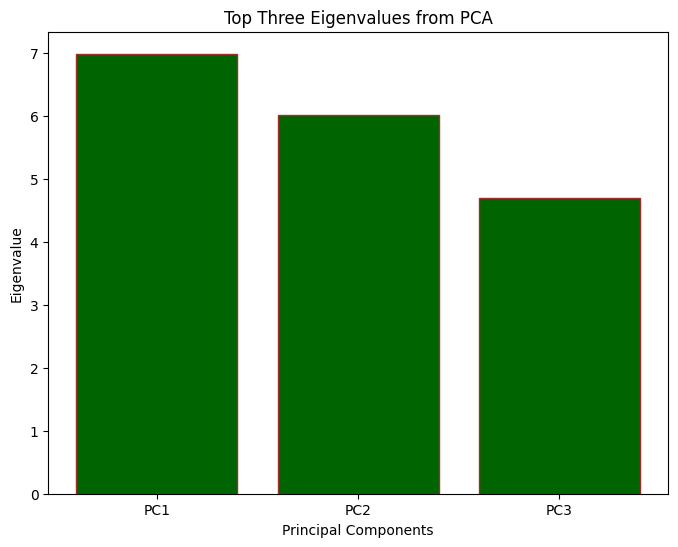

In [45]:
# Plot the top three eigenvalues using a bar plot
components = ['PC1', 'PC2', 'PC3']
plt.figure(figsize=(8, 6))
plt.bar(components, top_three_eigenvalues, color='darkgreen', edgecolor='brown')
plt.xlabel("Principal Components")
plt.ylabel("Eigenvalue")
plt.title("Top Three Eigenvalues from PCA")
plt.show()

**Observations:**
The bar chart reveals that the first principal component has a markedly higher eigenvalue compared to the second and third, indicating that it captures a substantially larger portion of the data's variance. This steep drop-off from PC1 to PC2 suggests that while PC1 is dominant in explaining the variability, the subsequent components contribute progressively less. Overall, these top three eigenvalues illustrate that most of the informative structure in the dataset is concentrated in the initial component, with diminishing returns from the following ones.